In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("enrollment.csv")
df = df.drop_duplicates()

In [ ]:
duplicated = df.duplicated().sum()
print(duplicated)

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982615 entries, 0 to 1006006
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            982615 non-null  object
 1   state           982615 non-null  object
 2   district        982615 non-null  object
 3   pincode         982615 non-null  int64 
 4   age_0_5         982615 non-null  int64 
 5   age_5_17        982615 non-null  int64 
 6   age_18_greater  982615 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 60.0+ MB


In [5]:
population = df
population = population.drop(columns = ['date', 'district', 'pincode'])
print(population.info())

<class 'pandas.core.frame.DataFrame'>
Index: 982615 entries, 0 to 1006006
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   state           982615 non-null  object
 1   age_0_5         982615 non-null  int64 
 2   age_5_17        982615 non-null  int64 
 3   age_18_greater  982615 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 37.5+ MB
None


In [6]:
grouped = population.groupby('state').agg({
    'age_0_5' : 'sum',
    'age_5_17' : 'sum',
    'age_18_greater' : 'sum'
}).reset_index()

In [ ]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           39 non-null     object
 1   age_0_5         39 non-null     int64 
 2   age_5_17        39 non-null     int64 
 3   age_18_greater  39 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


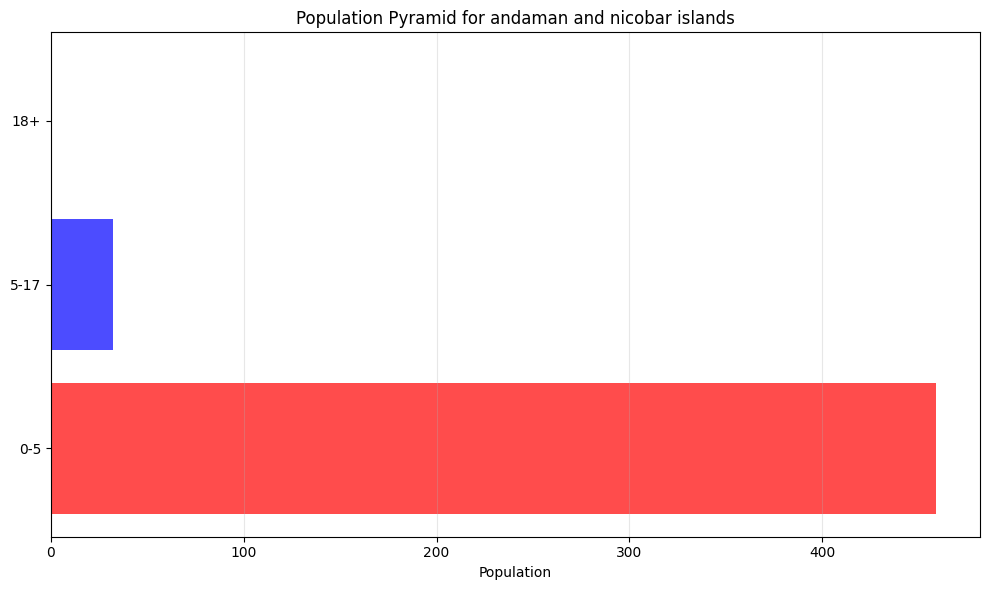

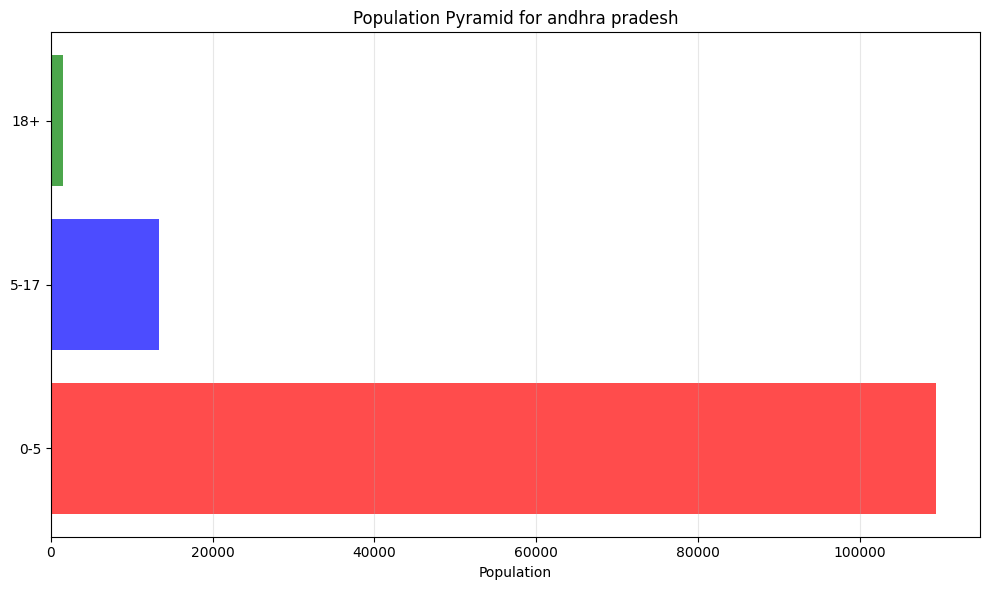

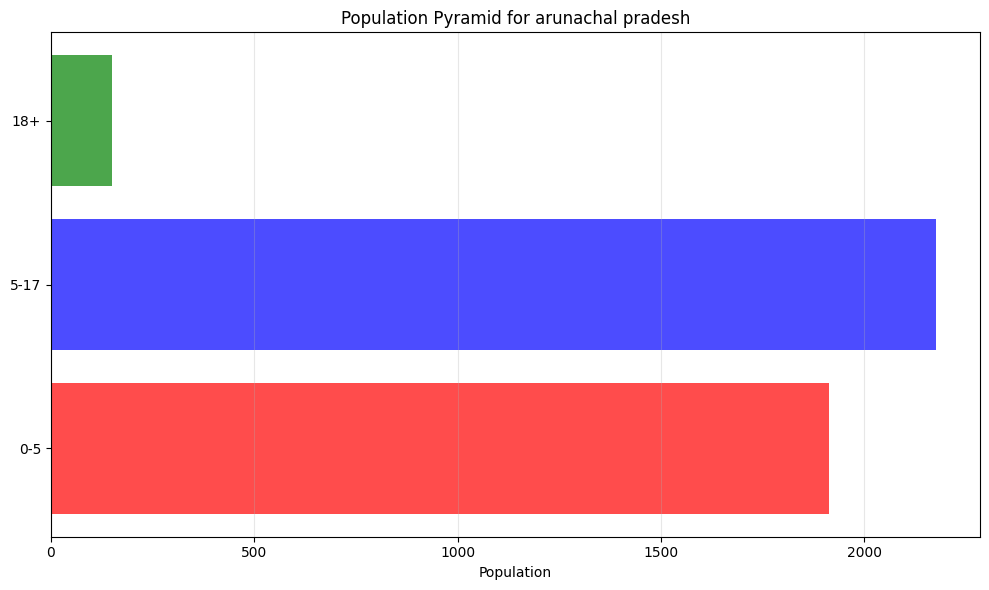

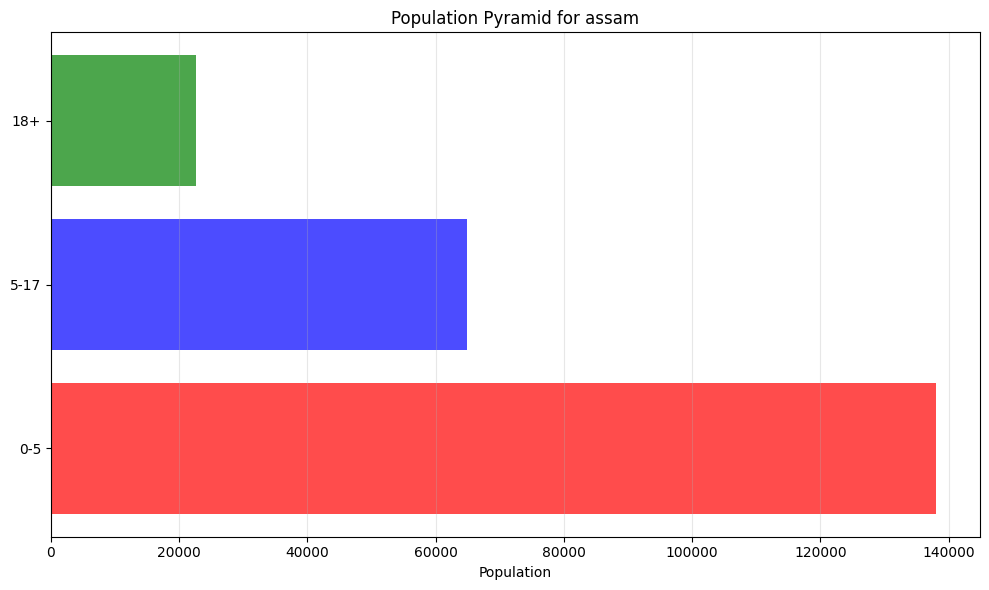

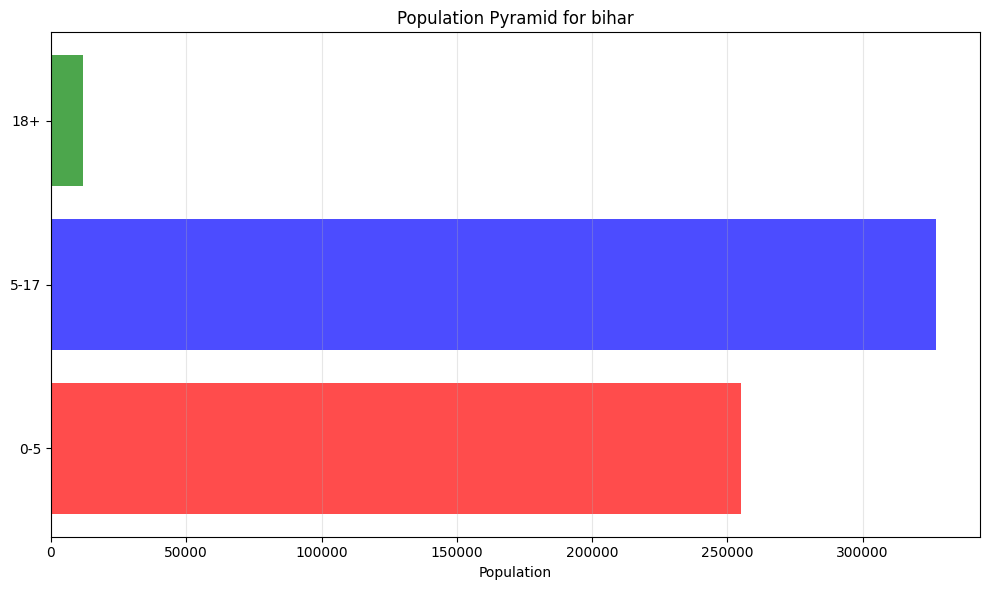

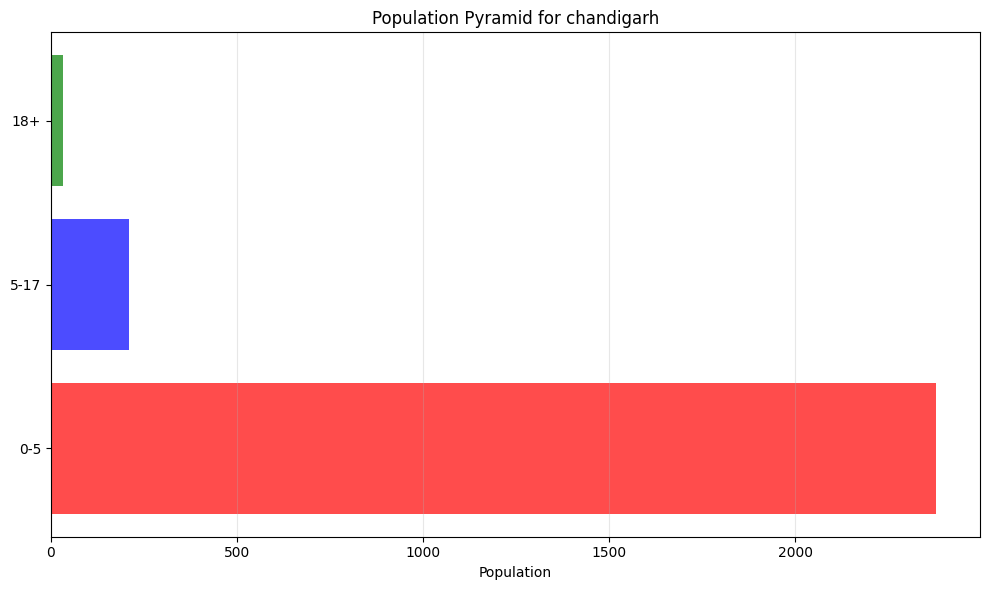

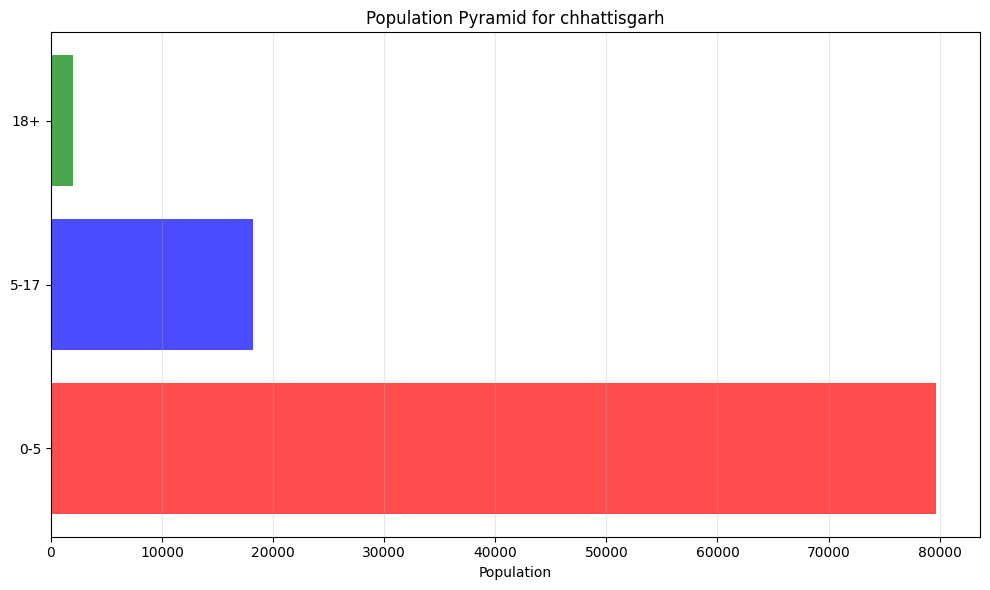

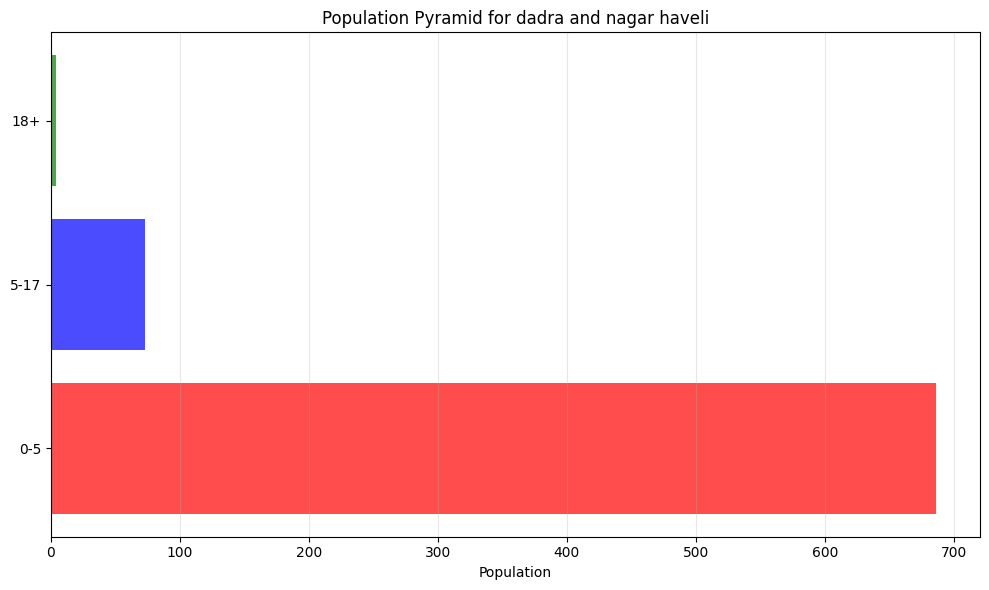

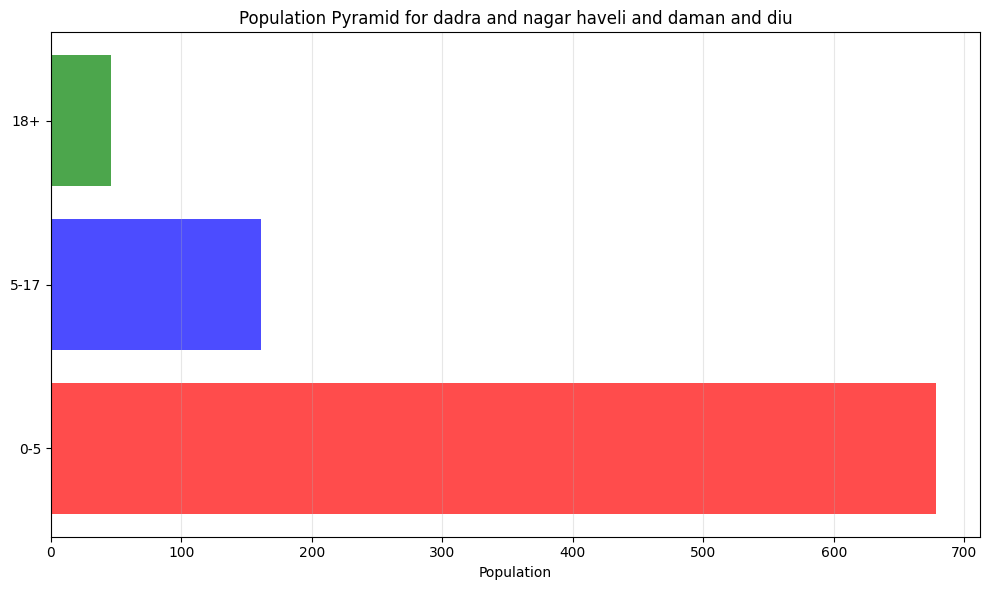

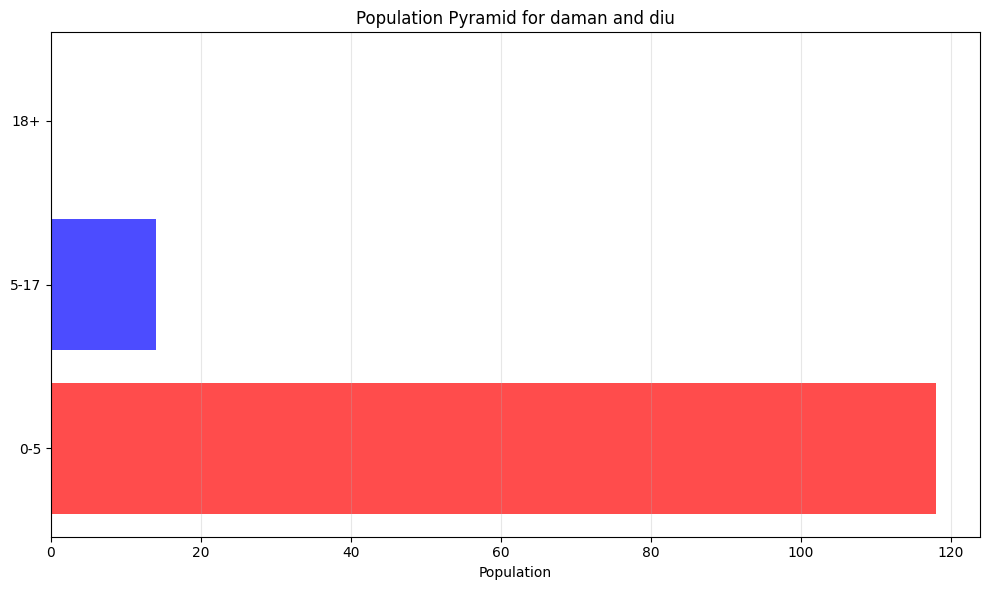

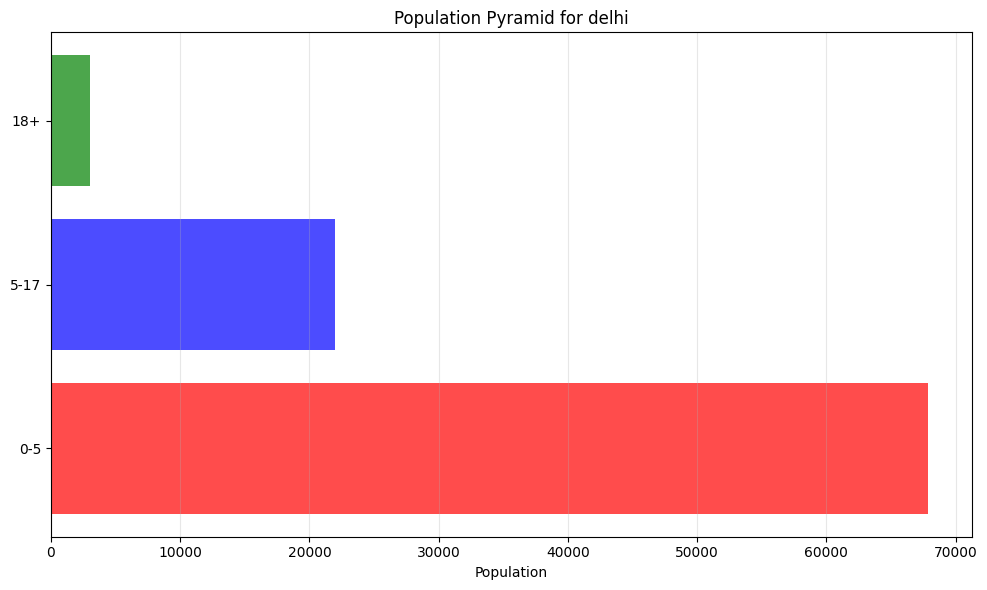

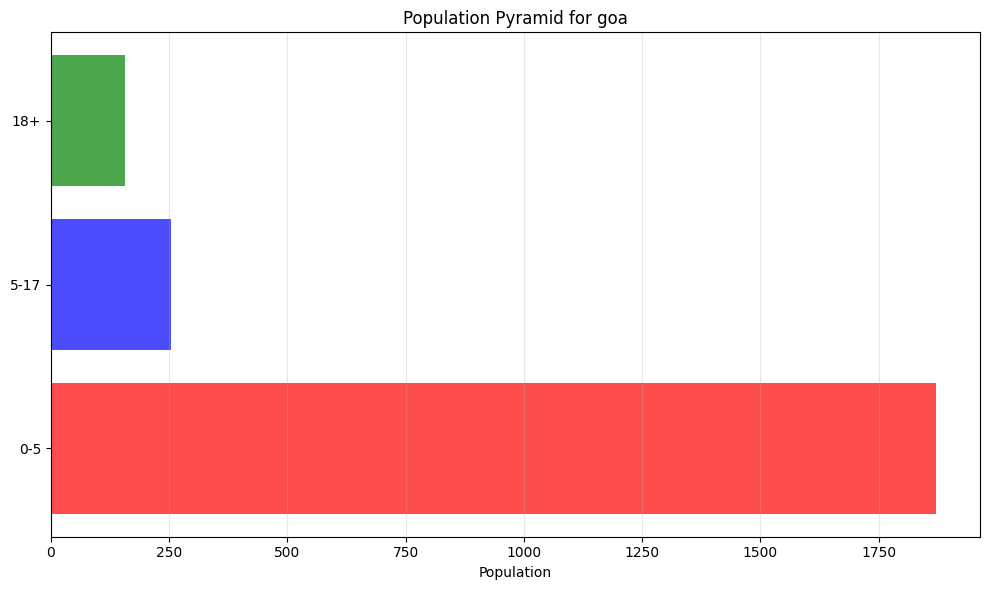

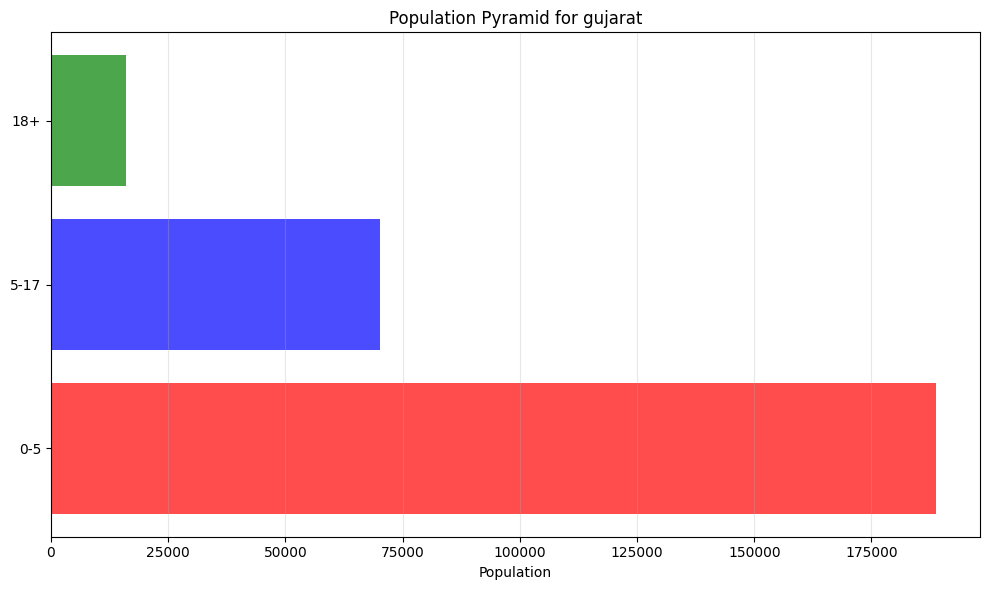

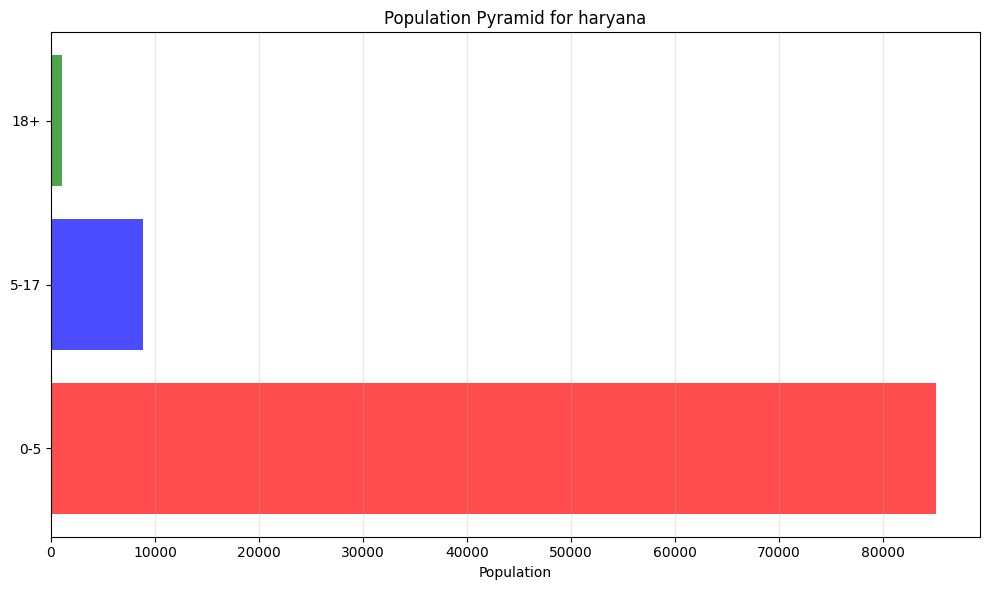

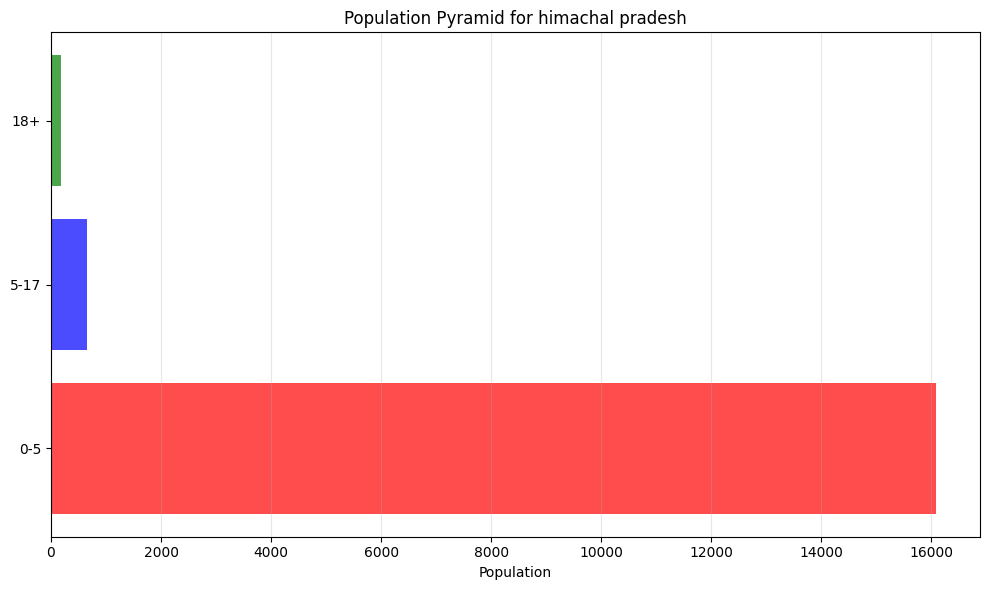

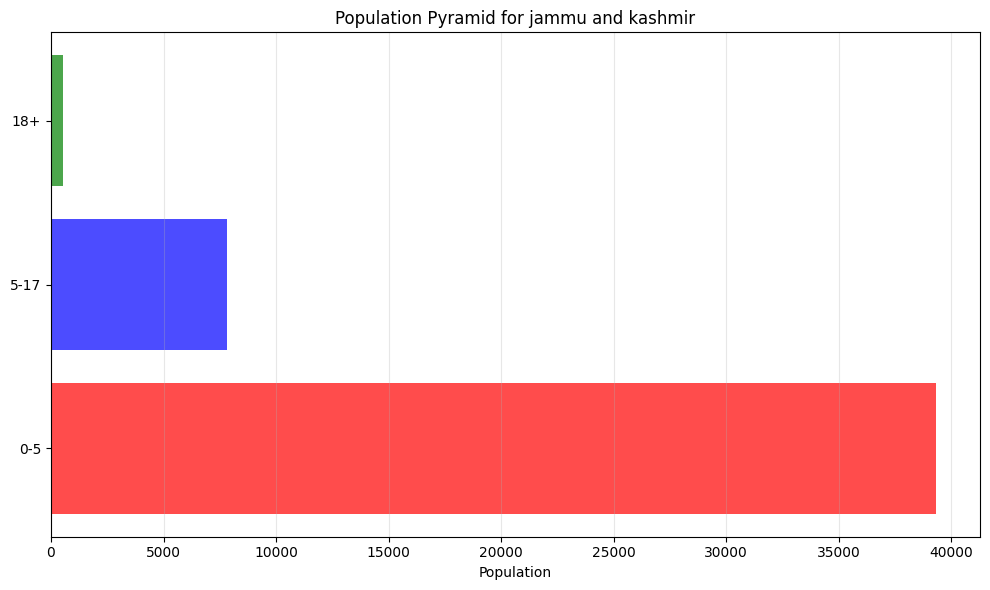

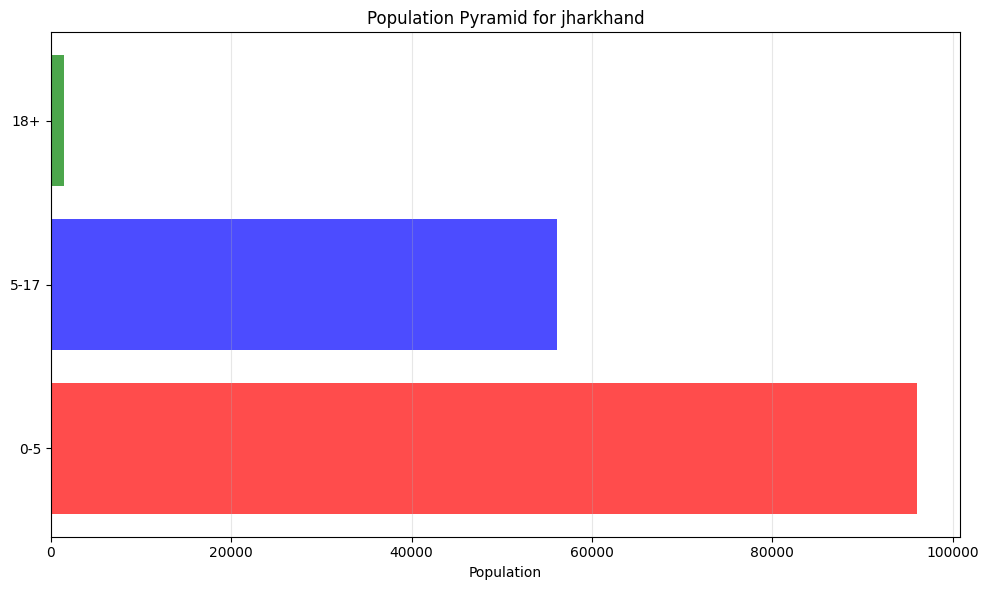

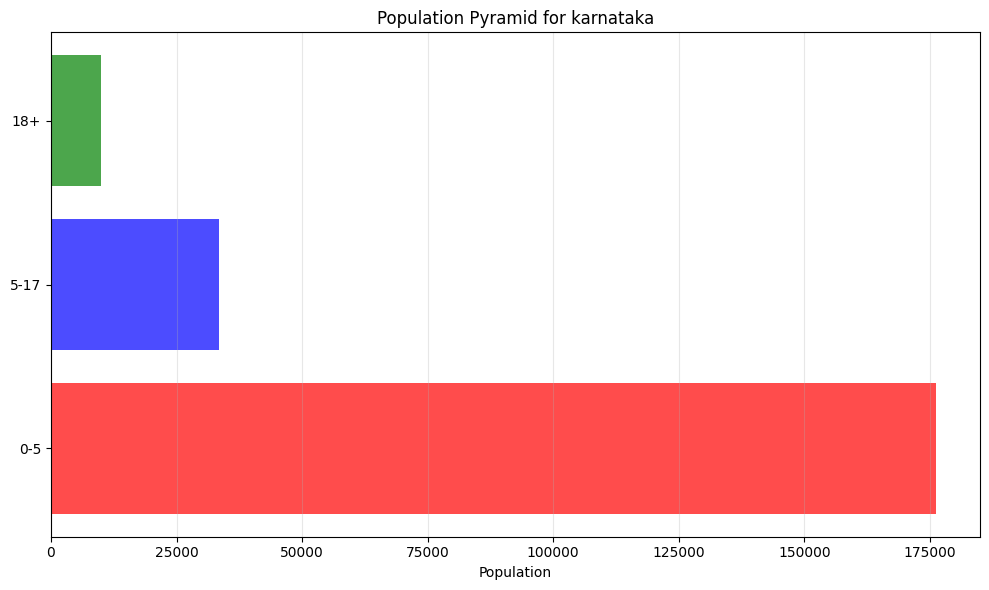

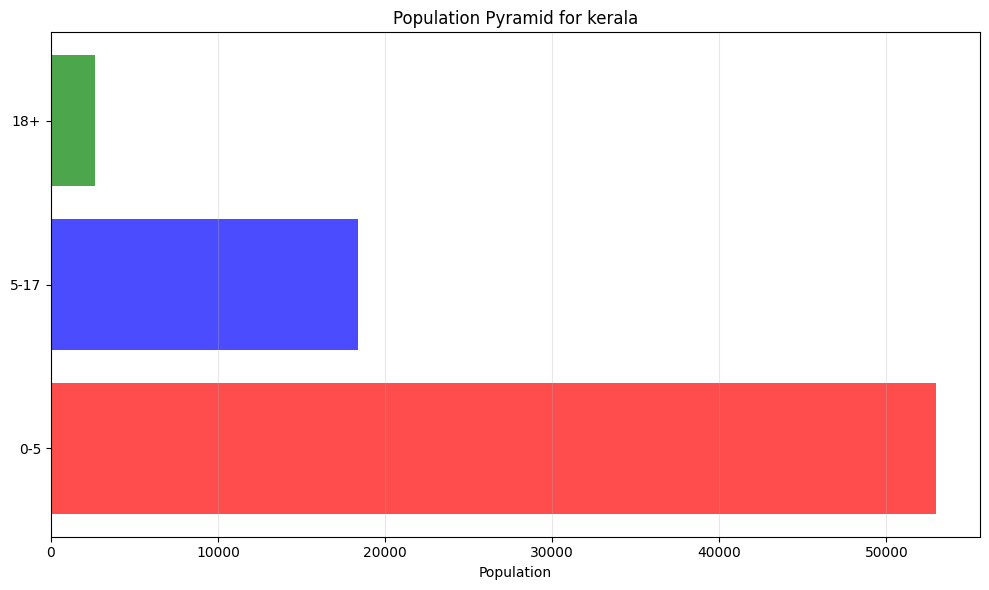

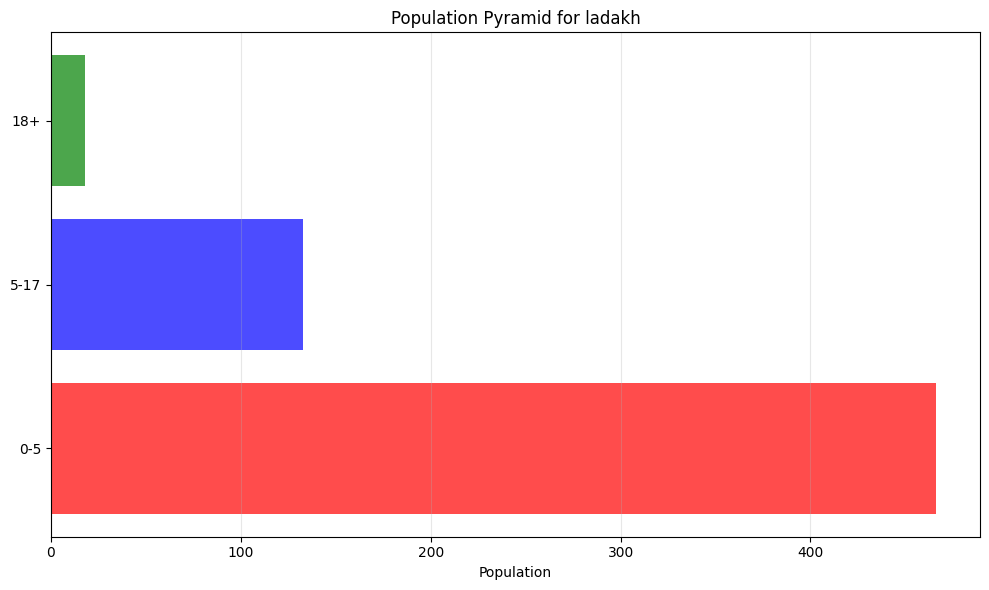

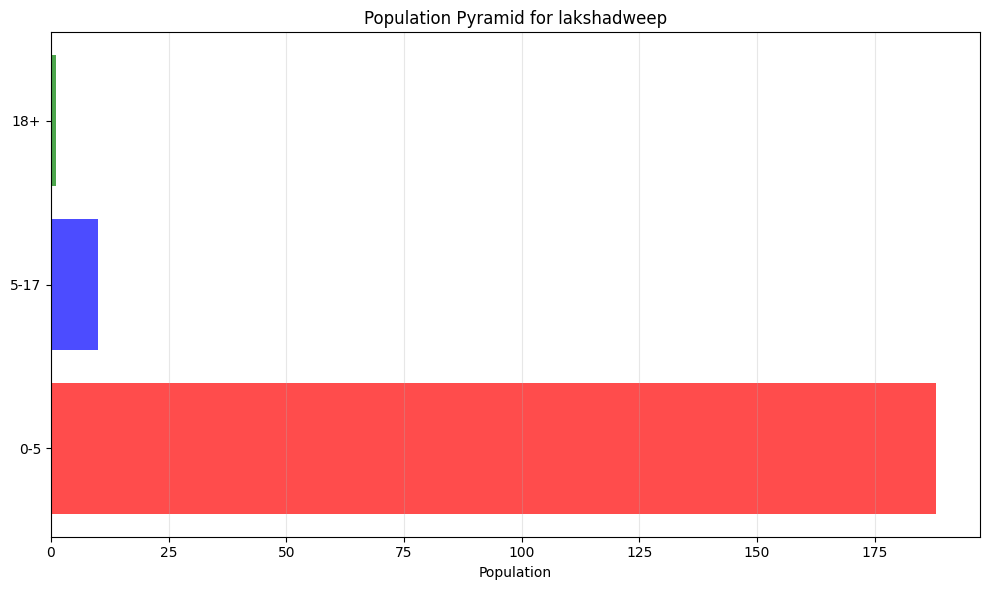

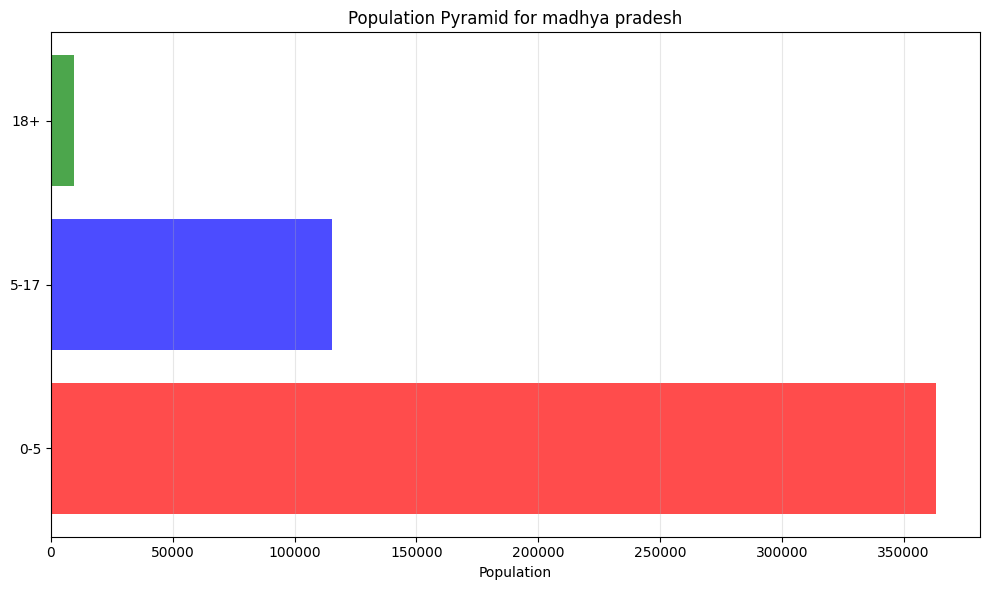

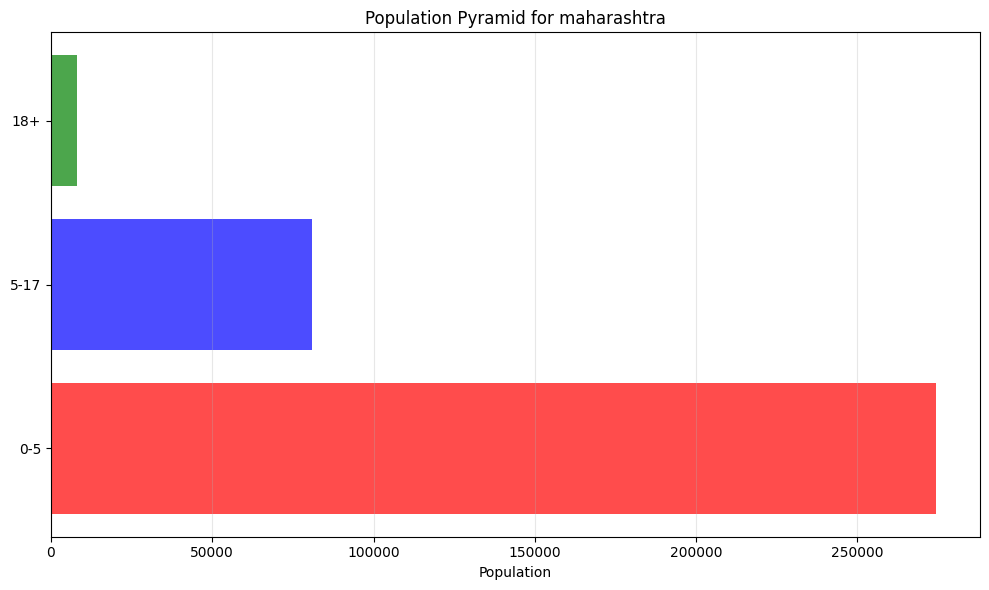

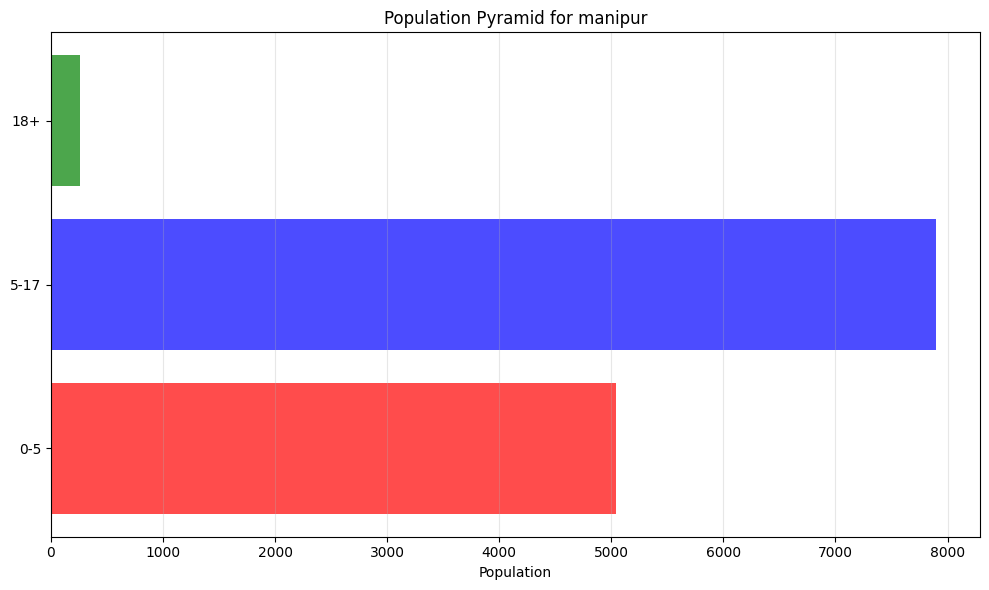

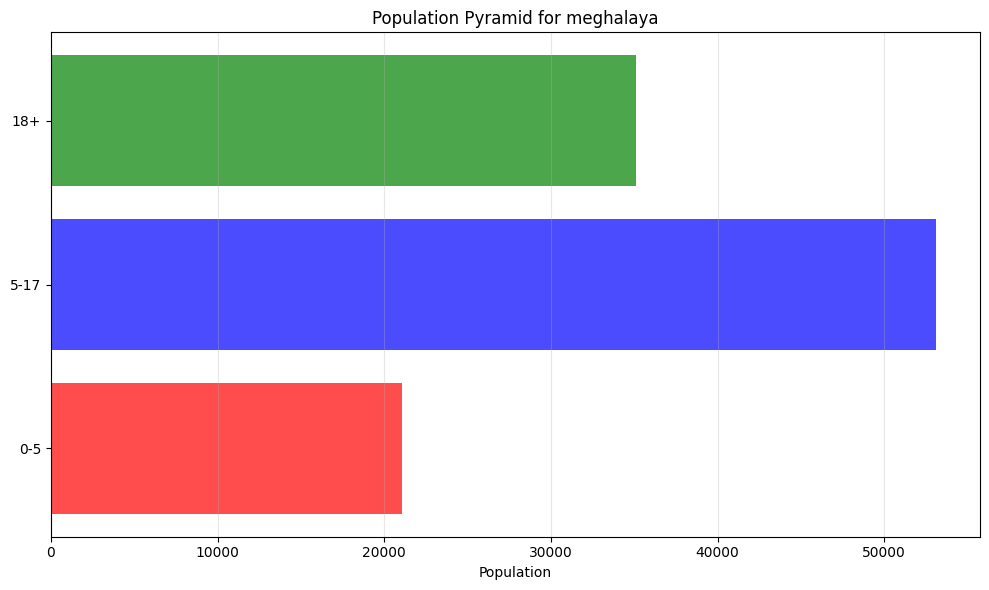

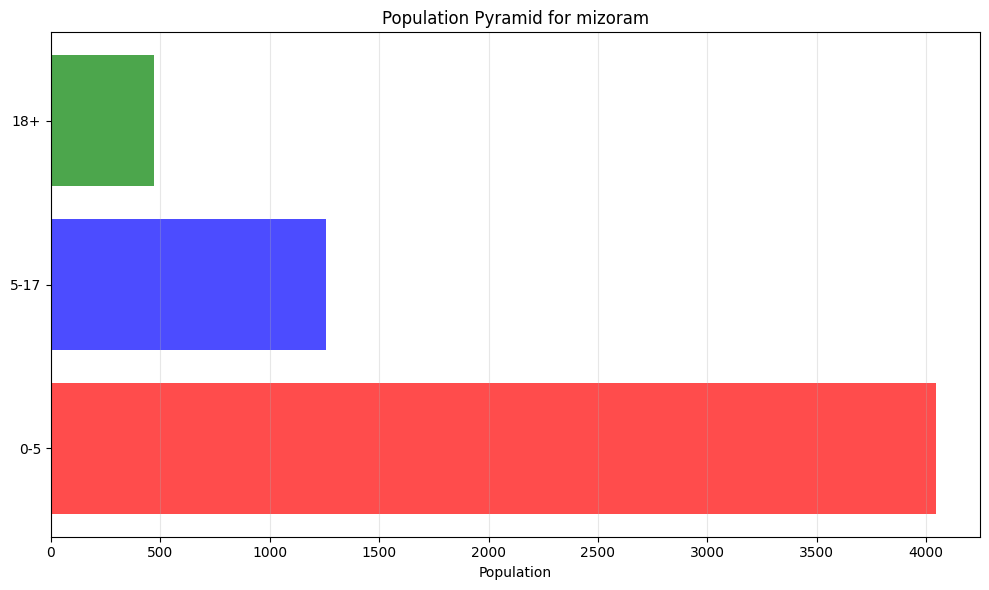

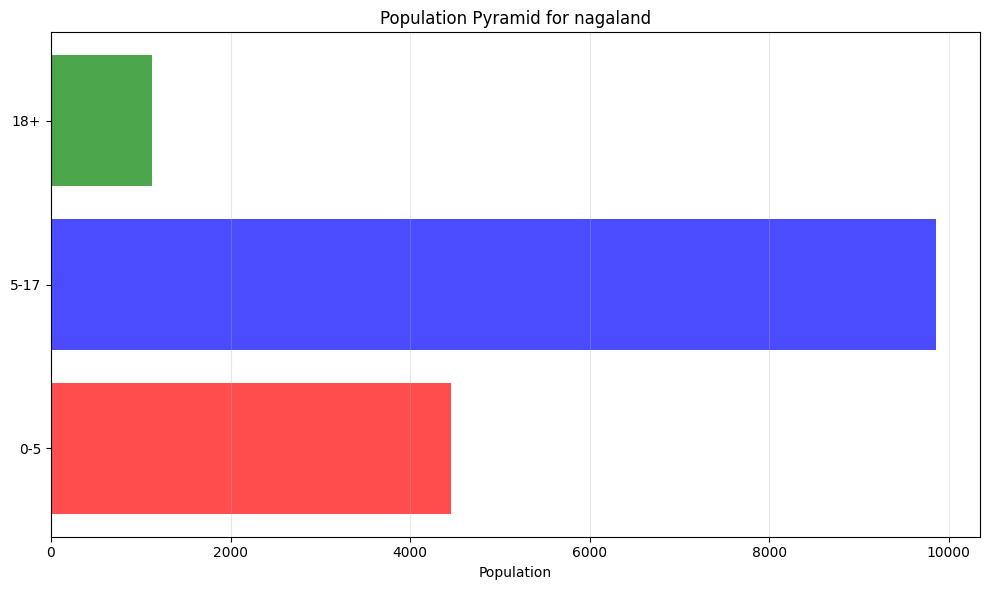

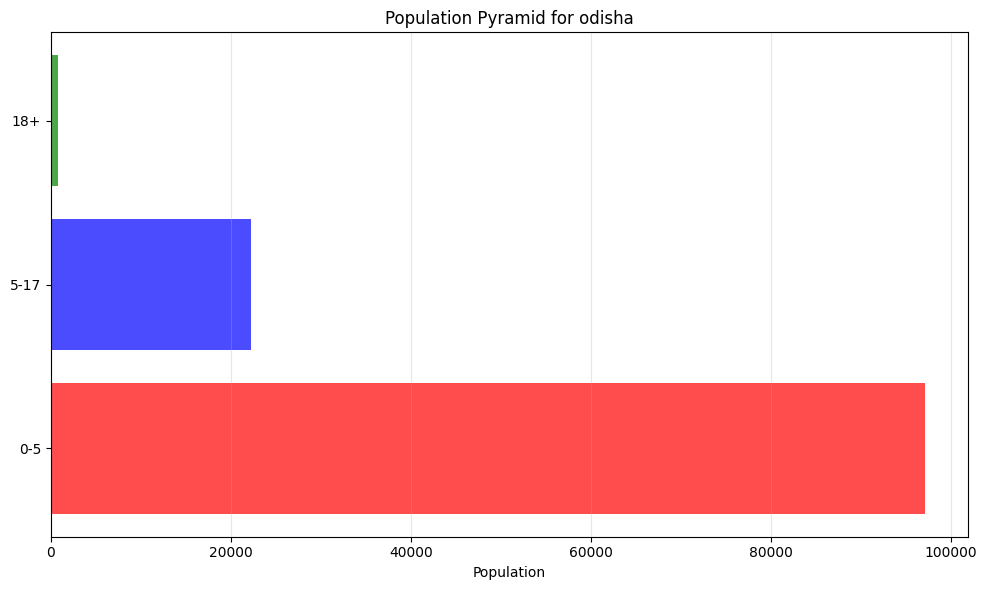

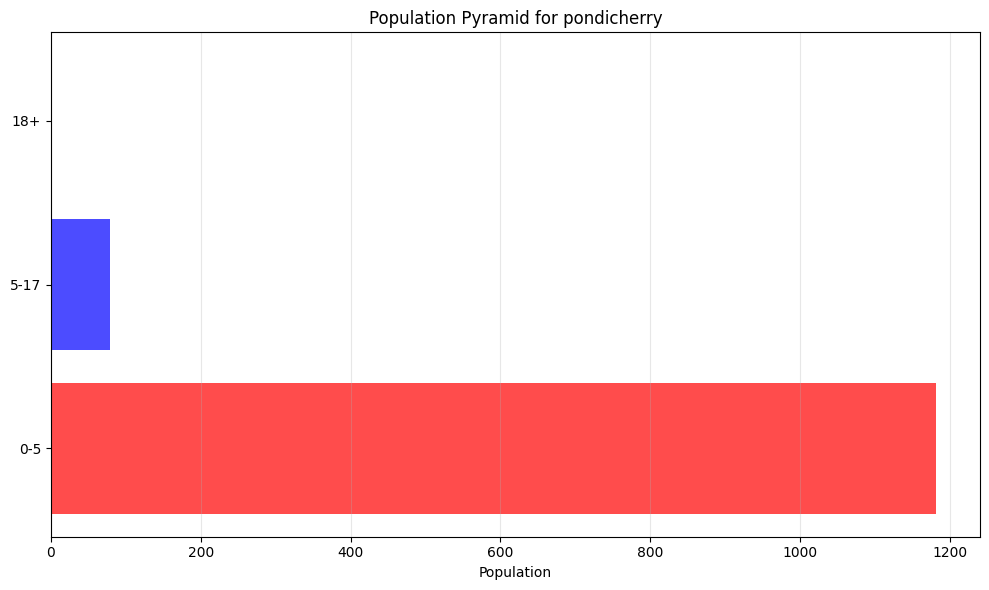

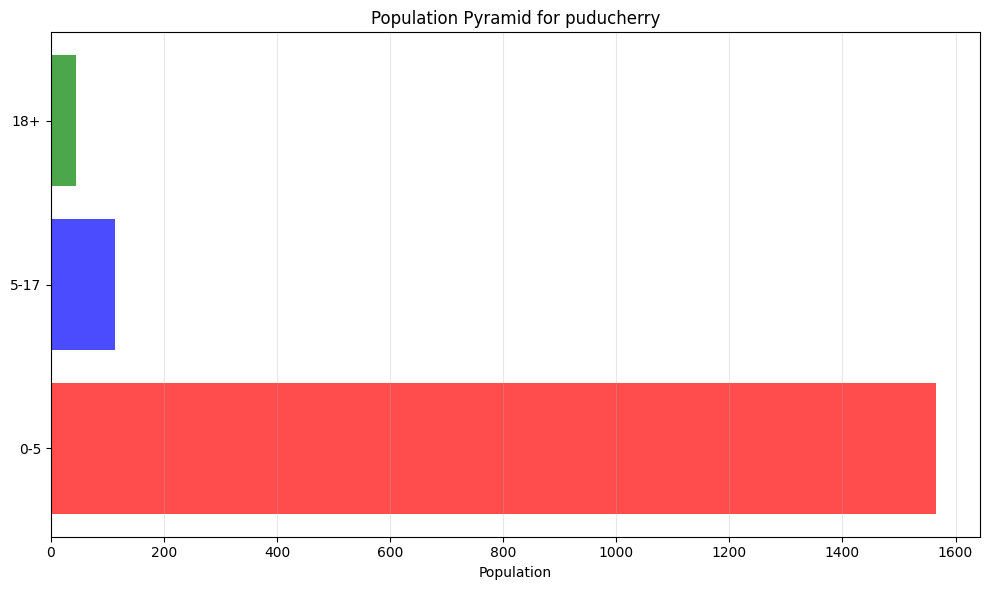

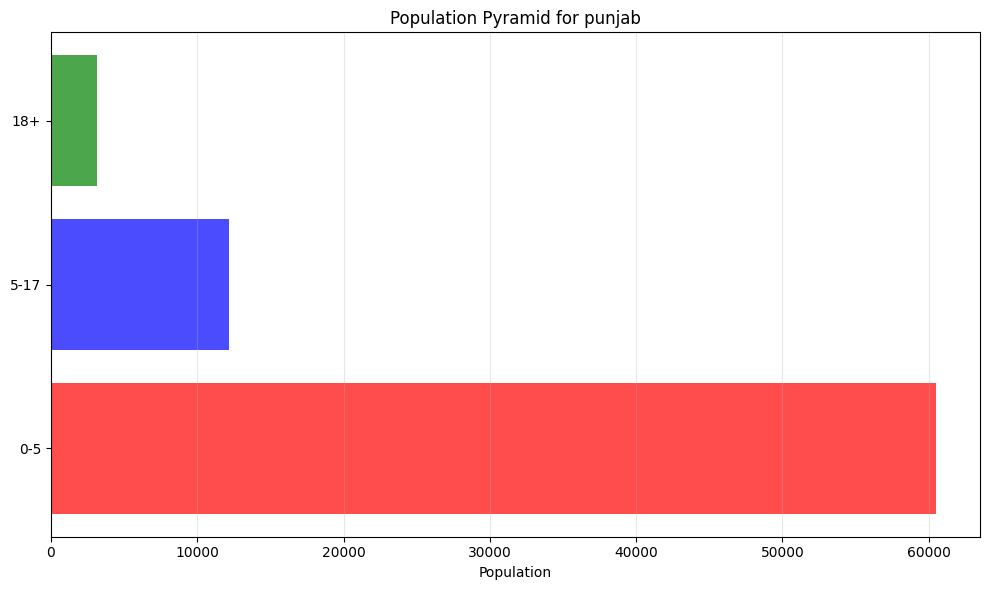

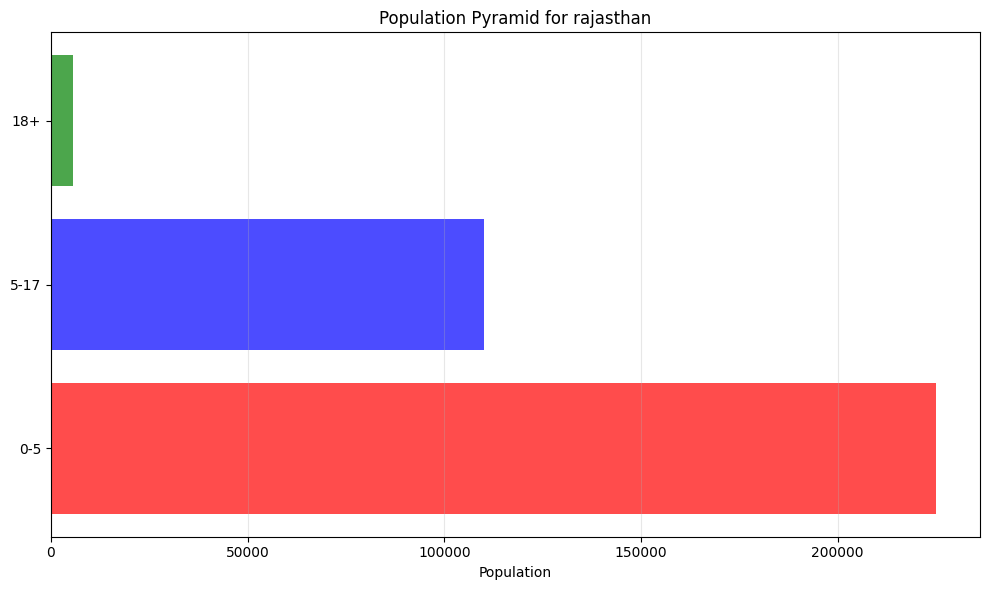

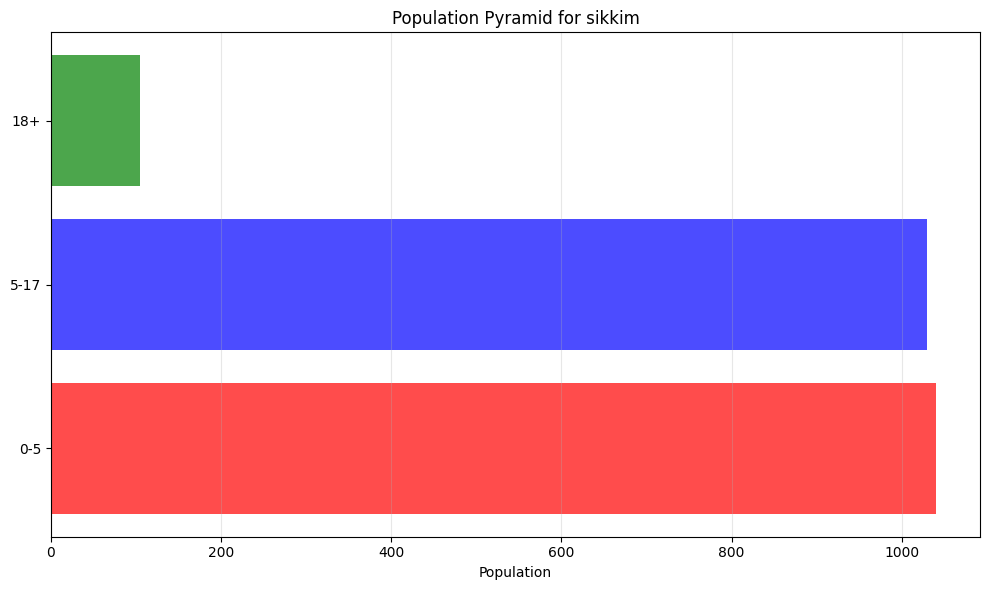

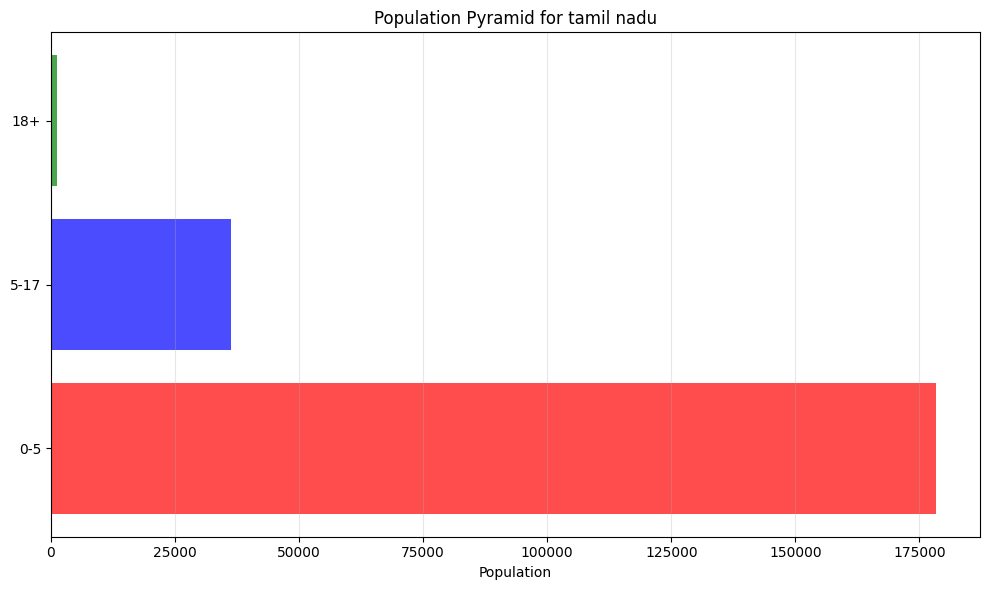

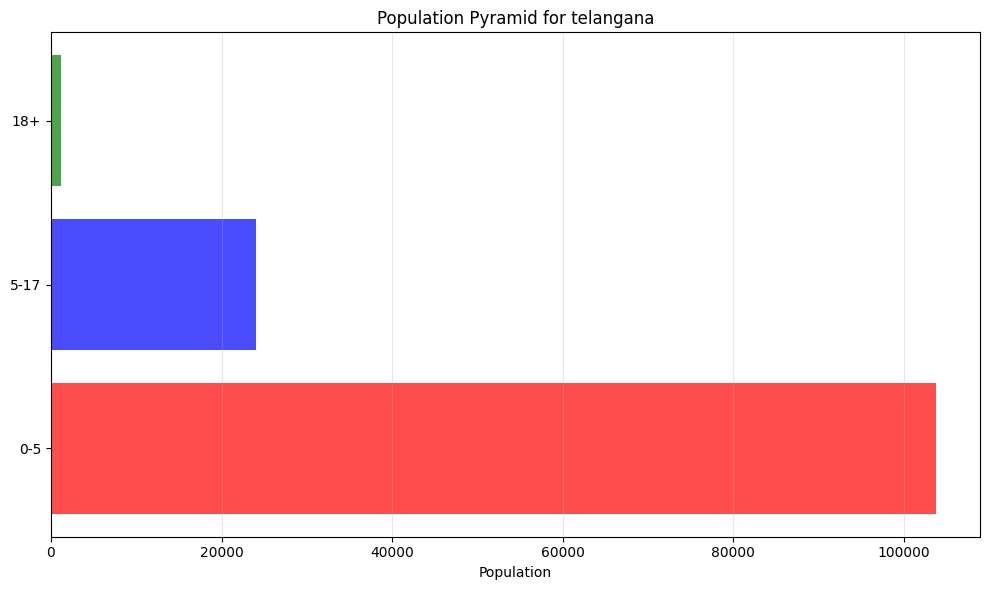

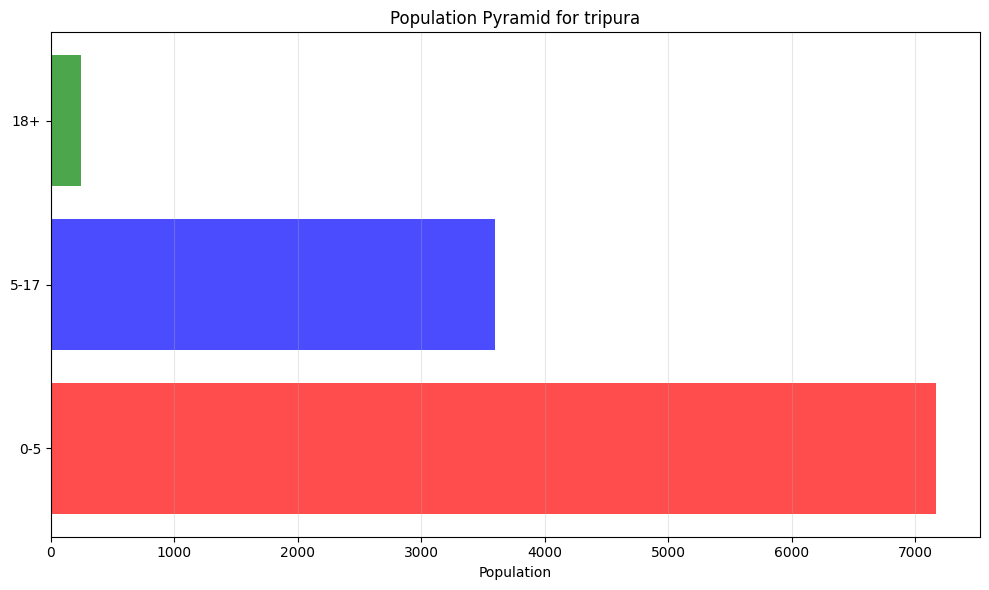

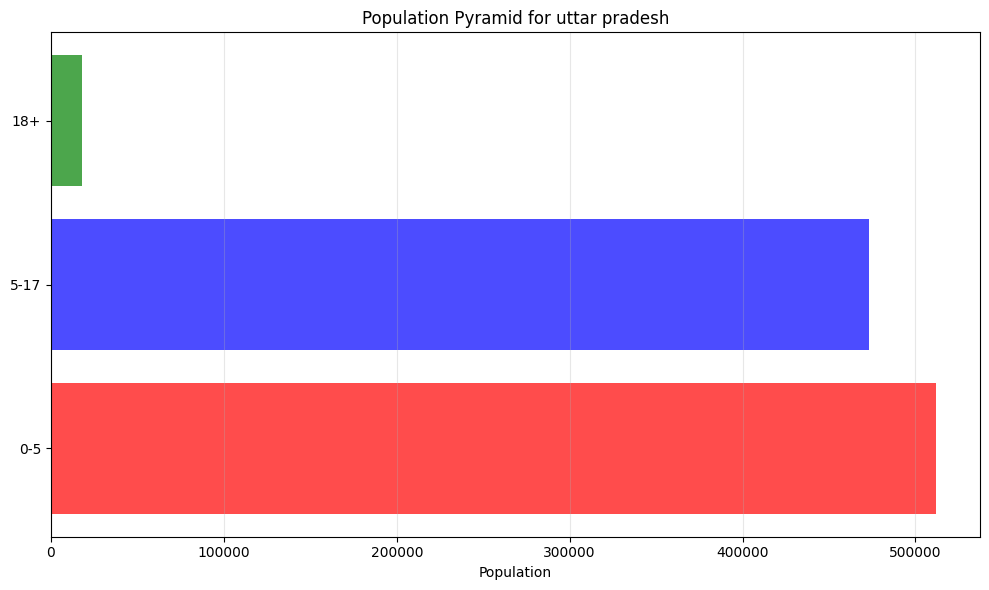

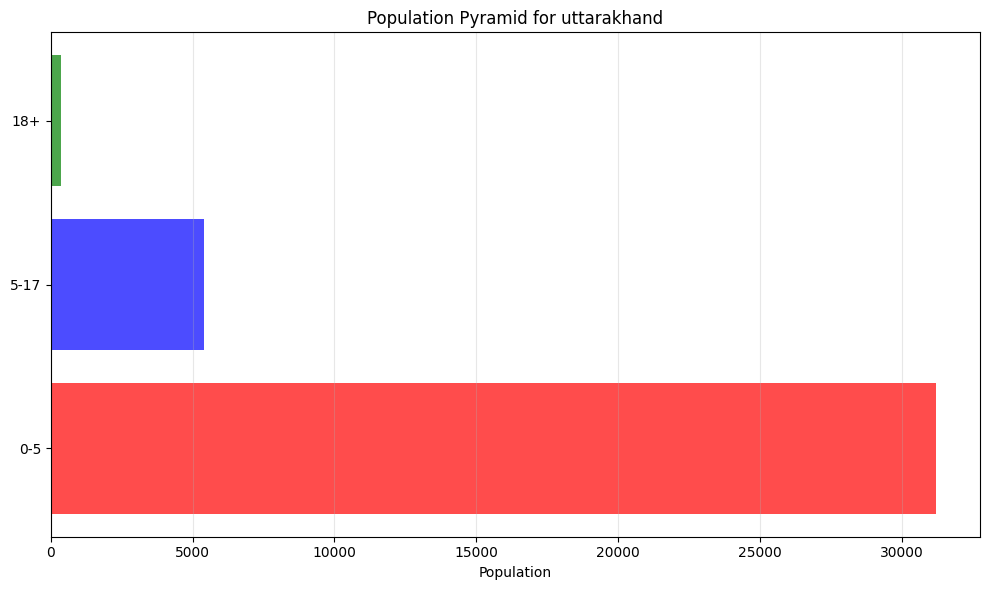

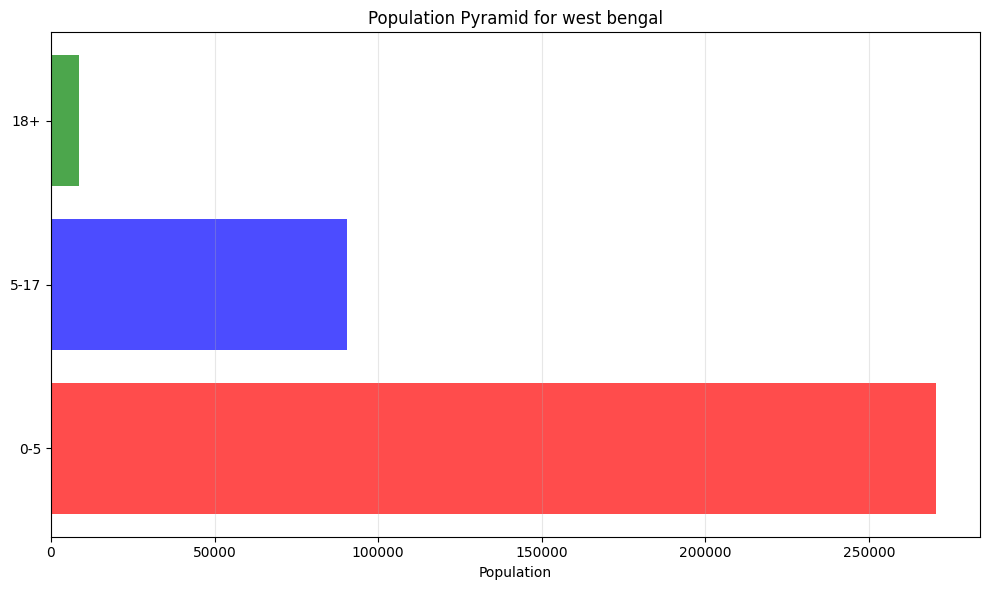

In [12]:
for _, row in grouped.iterrows():
    state = row['state']
    age_groups = ['0-5', '5-17', '18+']
    values = [row['age_0_5'], row['age_5_17'], row['age_18_greater']]
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
        
        # Create population pyramid with negative values for left side
    y_pos = np.arange(len(age_groups))
        
        # Plot bars (you can modify this to show as left/right if you have gender data)
    ax.barh(y_pos, values, color=['red', 'blue', 'green'], alpha=0.7)
        
        # Set labels and formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(age_groups)
    ax.set_xlabel("Population")
    ax.set_title(f"Population Pyramid for {state}")
    ax.grid(axis='x', alpha=0.3)
        
    plt.tight_layout()
    plt.show()